In [13]:
# Classification of Raisin dataset using Decision Tree, Logistic Regression 
# and Support Vector Machine(SVM) and compairing the results

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [15]:
raisin_data = pd.read_csv("Raisin_Dataset.csv")

raisin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [16]:
raisin_data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [17]:
raisin_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [18]:
# Preprocessing
X = raisin_data.drop(columns=['Class'])  # Features
y = raisin_data['Class']  # Target variable

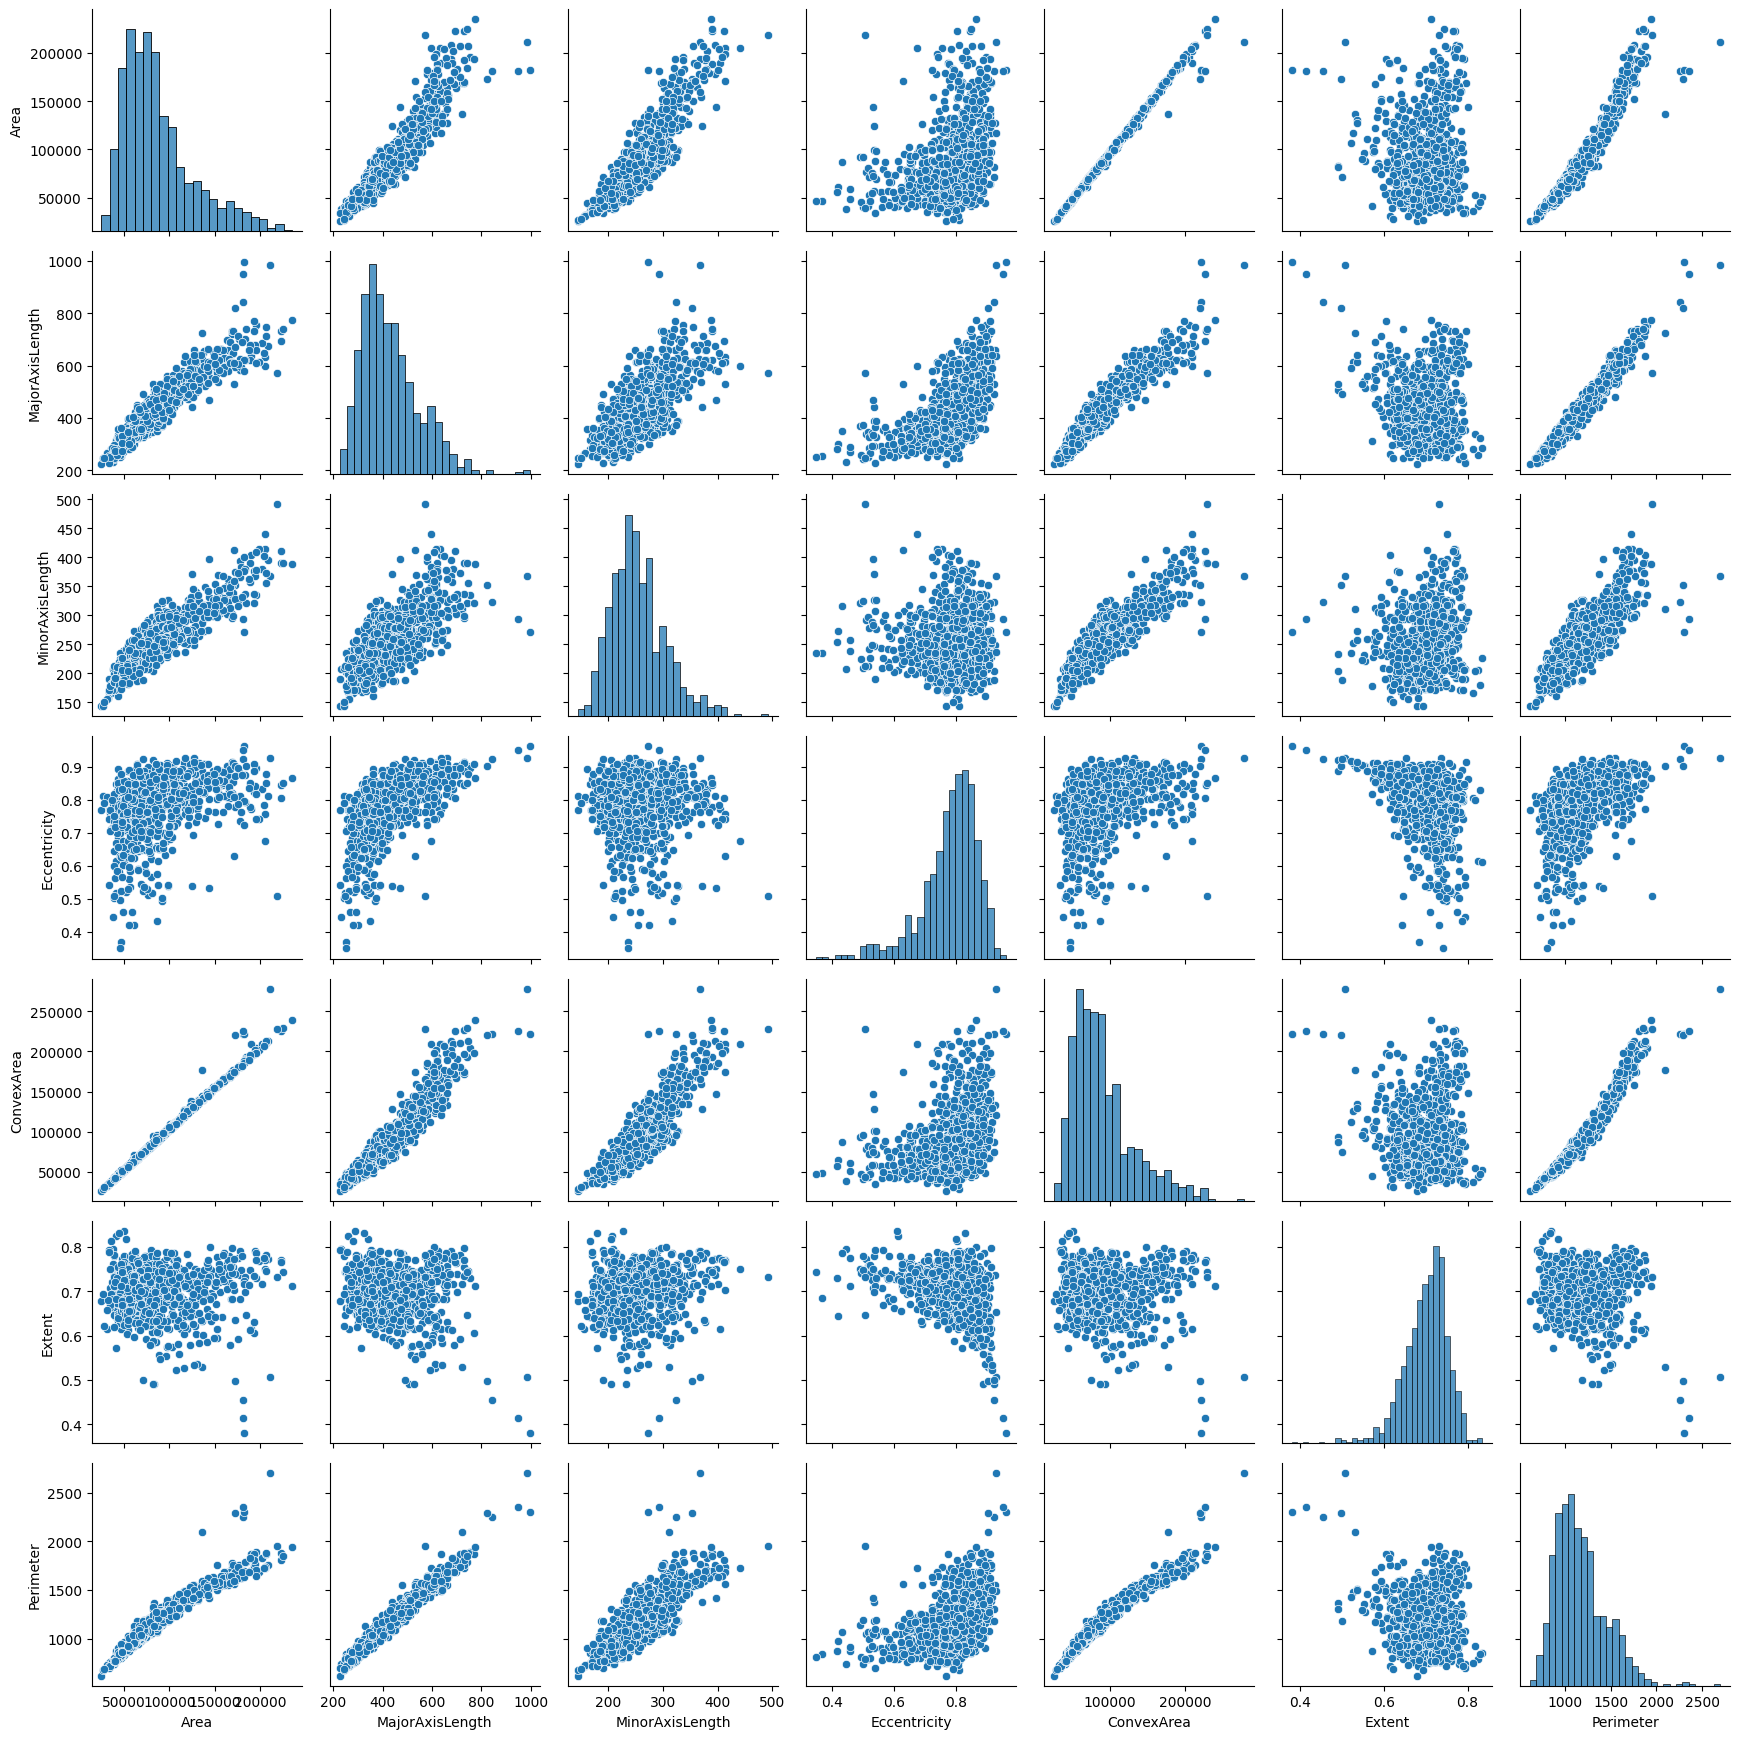

In [19]:
cols=['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter','Class']
sns.pairplot(raisin_data[cols],height=2.5)
plt.tight_layout()
plt.show()

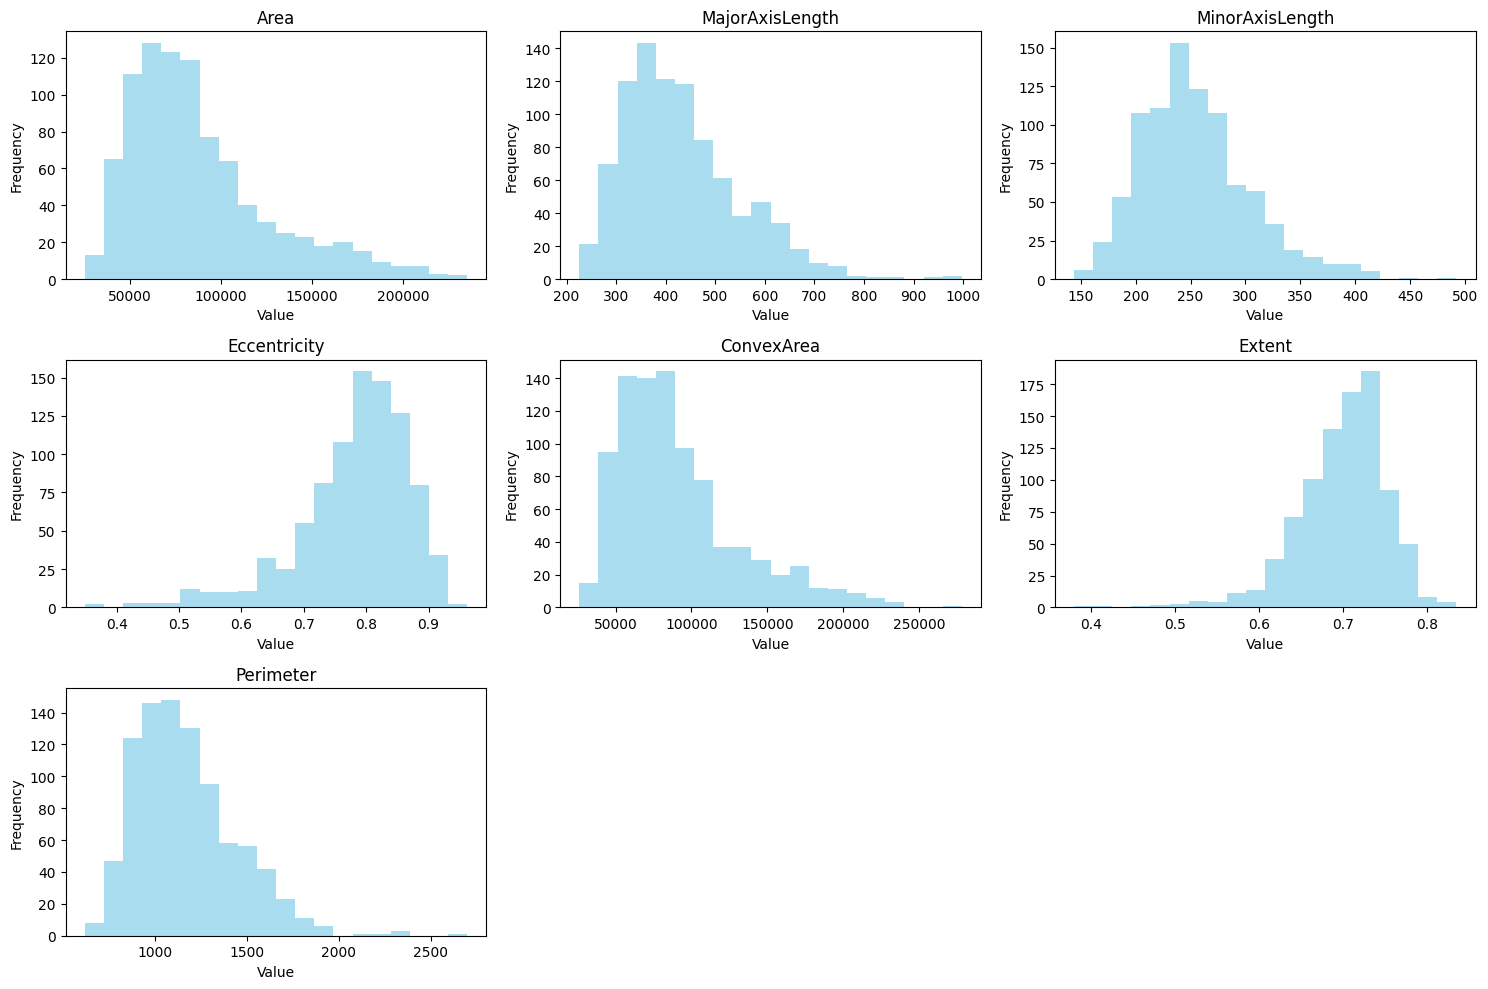

In [20]:
# Plot histograms for each column of the dataset
plt.figure(figsize=(15, 10))

for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(X[column], bins=20, color='skyblue', alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


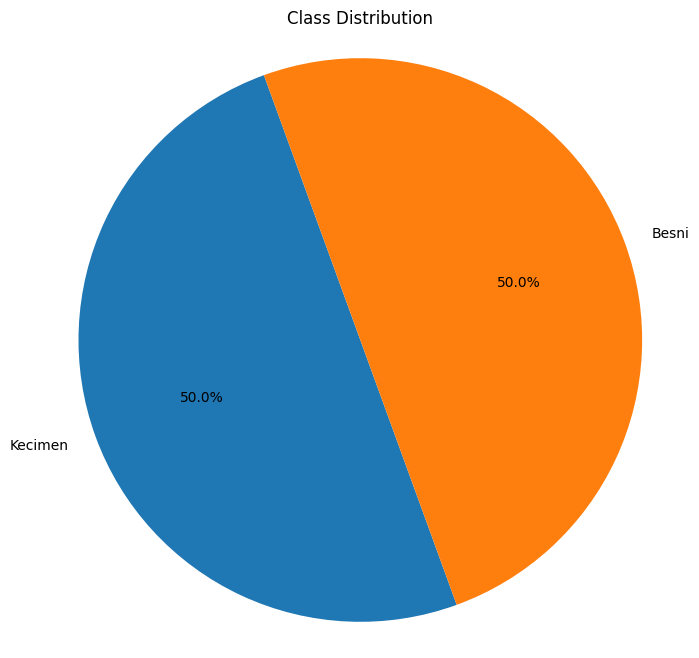

In [21]:
# Class distribution
class_distribution = raisin_data['Class'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=110)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


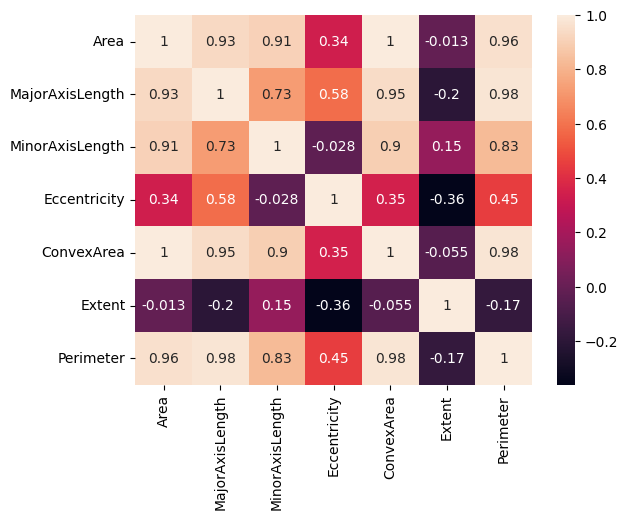

In [22]:
# Assuming X is dataset because Class contains string value so using X because in it class column is dropped
hm = sns.heatmap(X.corr(), annot=True)
plt.show()

In [23]:
# Split the dataset into training and testing sets for Decision Tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
clf_dt.fit(X_train_dt, y_train_dt)

# Make predictions on the test data for Decision Tree
y_pred_dt = clf_dt.predict(X_test_dt)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Display the decision tree rules
tree_rules = export_text(clf_dt, feature_names=X.columns.tolist())
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Accuracy: 0.79

Decision Tree Rules:
|--- MajorAxisLength <= 422.42
|   |--- Perimeter <= 1124.34
|   |   |--- Eccentricity <= 0.87
|   |   |   |--- Perimeter <= 929.76
|   |   |   |   |--- Extent <= 0.83
|   |   |   |   |   |--- Eccentricity <= 0.73
|   |   |   |   |   |   |--- Eccentricity <= 0.73
|   |   |   |   |   |   |   |--- Extent <= 0.68
|   |   |   |   |   |   |   |   |--- ConvexArea <= 49380.50
|   |   |   |   |   |   |   |   |   |--- class: Kecimen
|   |   |   |   |   |   |   |   |--- ConvexArea >  49380.50
|   |   |   |   |   |   |   |   |   |--- Extent <= 0.66
|   |   |   |   |   |   |   |   |   |   |--- class: Kecimen
|   |   |   |   |   |   |   |   |   |--- Extent >  0.66
|   |   |   |   |   |   |   |   |   |   |--- class: Besni
|   |   |   |   |   |   |   |--- Extent >  0.68
|   |   |   |   |   |   |   |   |--- Perimeter <= 774.73
|   |   |   |   |   |   |   |   |   |--- Perimeter <= 770.52
|   |   |   |   |   |   |   |   |   |   |--- class: Kecimen
|   |

In [24]:
# Decision Tree Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       Besni       0.77      0.79      0.78       129
     Kecimen       0.80      0.78      0.79       141

    accuracy                           0.79       270
   macro avg       0.78      0.79      0.78       270
weighted avg       0.79      0.79      0.79       270



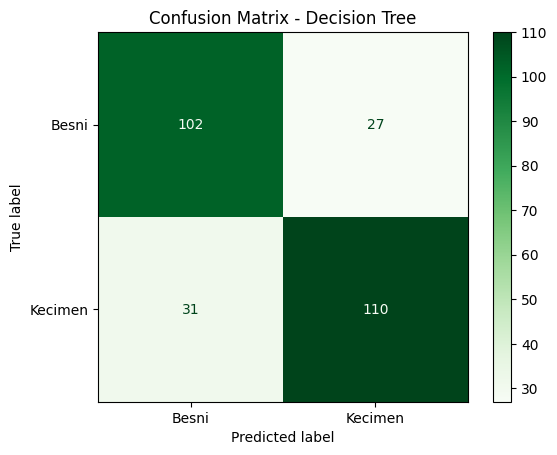

In [25]:
# Plot confusion matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_dt, y_pred_dt), display_labels=clf_dt.classes_)
disp_dt.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [26]:

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
hy_dt_classifier = DecisionTreeClassifier()

# Perform Grid Search with cross-validation
grid_search_dt = GridSearchCV(estimator=hy_dt_classifier, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train_dt, y_train_dt)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Initialize Decision Tree with best parameters
best_dt = grid_search_dt.best_estimator_

# Fit the model with optimized parameters
best_dt.fit(X_train_dt, y_train_dt)

# Make predictions on the test data
hy_y_pred_dt = best_dt.predict(X_test_dt)

# Calculate accuracy
hy_accuracy_dt = accuracy_score(y_test_dt, hy_y_pred_dt)
print(f"Decision Tree Accuracy after hypertuning: {hy_accuracy_dt:.2f}")


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy after hypertuning: 0.83


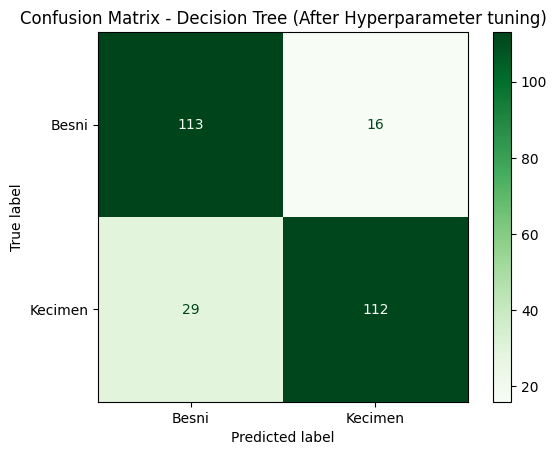

In [27]:
# Plot confusion matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_dt, hy_y_pred_dt), display_labels=clf_dt.classes_)
disp_dt.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Decision Tree (After Hyperparameter tuning)')
plt.show()


In [28]:

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model on the training data
model_lr.fit(X_train_lr, y_train_lr)

# Make predictions on the test data for Logistic Regression
y_pred_lr = model_lr.predict(X_test_lr)

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f"Logistic Regression Accuracy before tuning: {accuracy_lr:.2f}")



Logistic Regression Accuracy before tuning: 0.85


In [29]:
# Logistic Regression Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_lr, y_pred_lr))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85       129
     Kecimen       0.87      0.84      0.86       141

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



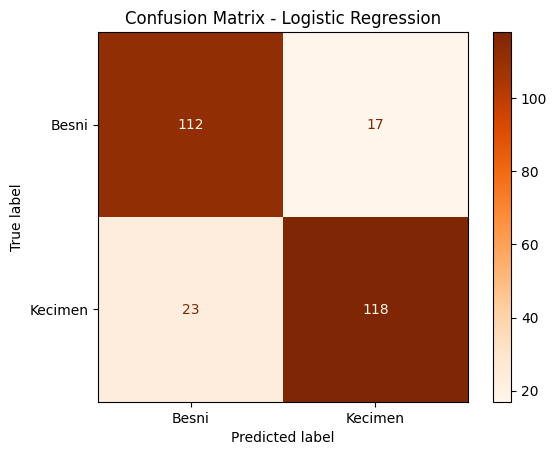

In [30]:
# Plot confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_lr, y_pred_lr), display_labels=model_lr.classes_)
disp_lr.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [31]:
from sklearn.feature_selection import SelectFromModel

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_test_scaled = scaler.transform(X_test_lr)

# Feature selection
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
X_train_selected = selector.fit_transform(X_train_scaled, y_train_lr)
X_test_selected = selector.transform(X_test_scaled)


param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1],  
    'penalty': ['l2'],               
    'solver': ['liblinear'] 
}

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

# Perform Grid Search with cross-validation
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train_selected, y_train_lr)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

# Initialize Logistic Regression with best parameters
best_lr = grid_search_lr.best_estimator_

# Fit the model with optimized parameters
best_lr.fit(X_train_selected, y_train_lr)

# Make predictions on the test data
hy_y_pred_lr = best_lr.predict(X_test_selected)

# Calculate accuracy
hy_accuracy_lr = accuracy_score(y_test_lr, hy_y_pred_lr)
print(f"Logistic Regression Accuracy after tuning: {hy_accuracy_lr:.2f}")


Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy after tuning: 0.87


In [32]:
from sklearn.svm import SVC


X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X , y, test_size=0.3, random_state=42)

# Initialize SVM with default parameters
svm_classifier = SVC()

# Fit the SVM model
svm_classifier.fit(X_train_svm, y_train_svm)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_svm)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"SVM Accuracy (without hyperparameter tuning): {accuracy_svm:.2f}")

SVM Accuracy (without hyperparameter tuning): 0.85


In [33]:
# SVM Classification Report
print("\nSVM Classification Report:")
print(classification_report(y_test_svm, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.83      0.84       129
     Kecimen       0.85      0.87      0.86       141

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



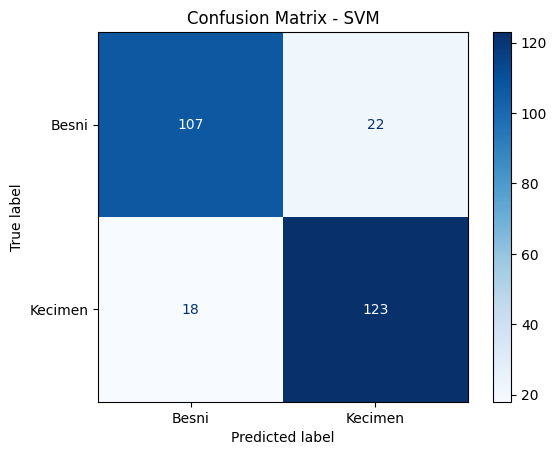

In [34]:
# Plot confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_svm, y_pred_svm), display_labels=svm_classifier.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()


In [56]:

# Scale the features
scaler = StandardScaler()
svm_X_train_scaled = scaler.fit_transform(X_train_svm)
svm_X_test_scaled = scaler.transform(X_test_svm)


param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

svm_grid = GridSearchCV(SVC(random_state=42), param_grid_svm,  cv=5) 


svm_grid.fit(svm_X_train_scaled, y_train_svm) 


print(svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(f"SVM Accuracy (with hyperparameter tuning): {svm_grid.best_score_:.2f}") 

svm_grid_predictions = svm_grid.predict(svm_X_test_scaled) 
  


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Accuracy (with hyperparameter tuning): 0.88


In [36]:
# Comparison of results
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'SVM'],
    'Accuracy before': [accuracy_dt, accuracy_lr, accuracy_svm],
    'Accuracy after': [hy_accuracy_dt, hy_accuracy_lr, svm_grid.best_score_]
})
print("\nComparison of Results:")
print(results)


Comparison of Results:
                 Model  Accuracy before  Accuracy after
0        Decision Tree         0.785185        0.833333
1  Logistic Regression         0.851852        0.866667
2                  SVM         0.851852        0.879365


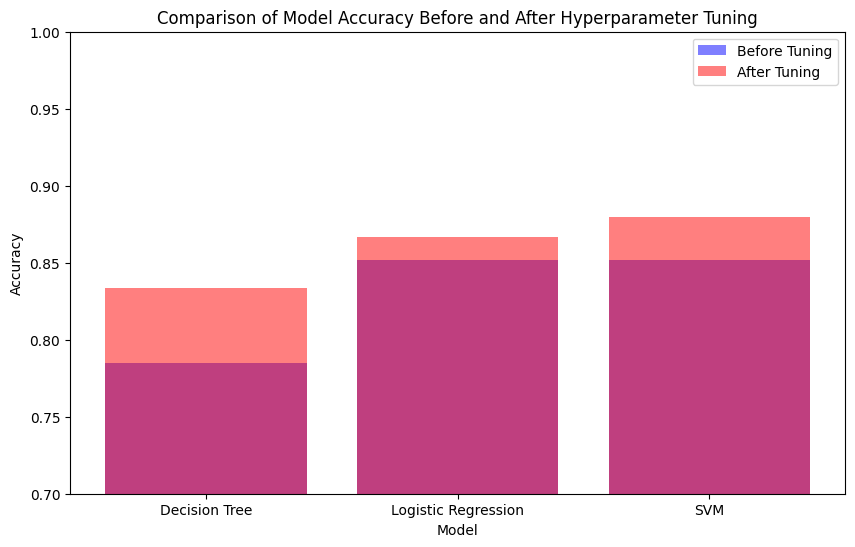

In [37]:
# Plotting of bar graph
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy before'], color='b', alpha=0.5, label='Before Tuning')
plt.bar(results['Model'], results['Accuracy after'], color='r', alpha=0.5, label='After Tuning')
plt.title('Comparison of Model Accuracy Before and After Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.7, 1.0)  
plt.show()

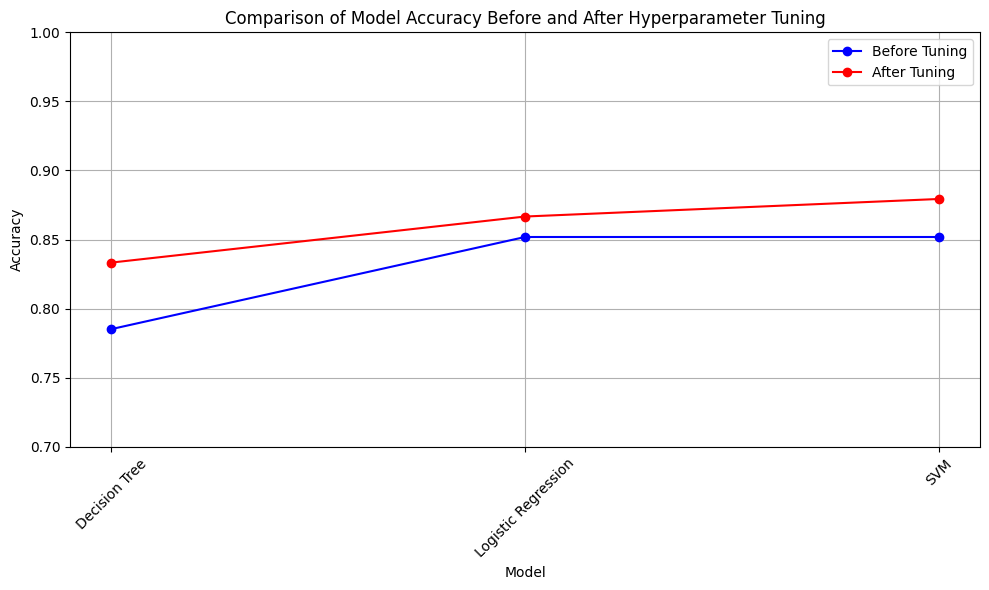

In [38]:
# Plotting of line graph
plt.figure(figsize=(10, 6))

plt.plot(results['Model'], results['Accuracy before'], marker='o', linestyle='-', color='b', label='Before Tuning')


plt.plot(results['Model'], results['Accuracy after'], marker='o', linestyle='-', color='r', label='After Tuning')


plt.title('Comparison of Model Accuracy Before and After Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(0.7, 1.0)  
plt.tight_layout()


plt.show()